In [1]:
import requests
from bs4 import BeautifulSoup
import os
import re
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
url='https://en.wikipedia.org/wiki/List_of_dystopian_literature'

In [3]:
res = requests.get(url)
html_page = res.text

soup = BeautifulSoup(html_page, 'html.parser')
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of dystopian literature - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"07a9edd1-5dff-4a68-92fb-b3a7adc04ab0","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_dystopian_literature","wgTitle":"List of dystopian literature","wgCurRevisionId":1121479111,"wgRevisionId":1121479111,"wgArticleId":1899244,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: url-status","Webarchive template wayback links","All articles with inc

In [4]:
padrao = "by"
marcador = "\([0-9]{4}\) by "
separador = r"(\([0-9]{4}\))"
colunas = ['Livro','Ano','Autor']

In [21]:
lista=[]

for link in soup.find_all(lambda tag: tag.name == "li" and padrao in tag.text):
    if re.search(marcador, link.text):
        lista.append((re.split(separador, link.text)))
        df = pd.DataFrame(data=lista)

In [28]:
myfile="./file.csv"
df.to_csv(myfile)

In [7]:
df.drop(df.columns[[3, 4, 5, 6]], axis=1, inplace=True)
df.columns=colunas

df["Livro"] = df["Livro"].str.rstrip()
df["Ano"] = df["Ano"].apply(lambda x: x.replace("(", ""))
df["Ano"] = df["Ano"].apply(lambda x: x.replace(")", ""))

In [8]:
df["Autor"] = df["Autor"].apply(lambda x: x.replace(" by ", ""))
df["Autor"] = df["Autor"].str.split("(").str[0]
df["Autor"] = df["Autor"].str.split("[").str[0]

In [9]:
print(df.dtypes)

Livro    object
Ano      object
Autor    object
dtype: object


In [10]:
df['Ano']= df['Ano'].astype(int)

In [11]:
sns.set(rc={"figure.figsize":(20, 5)})

<AxesSubplot: xlabel='Ano'>

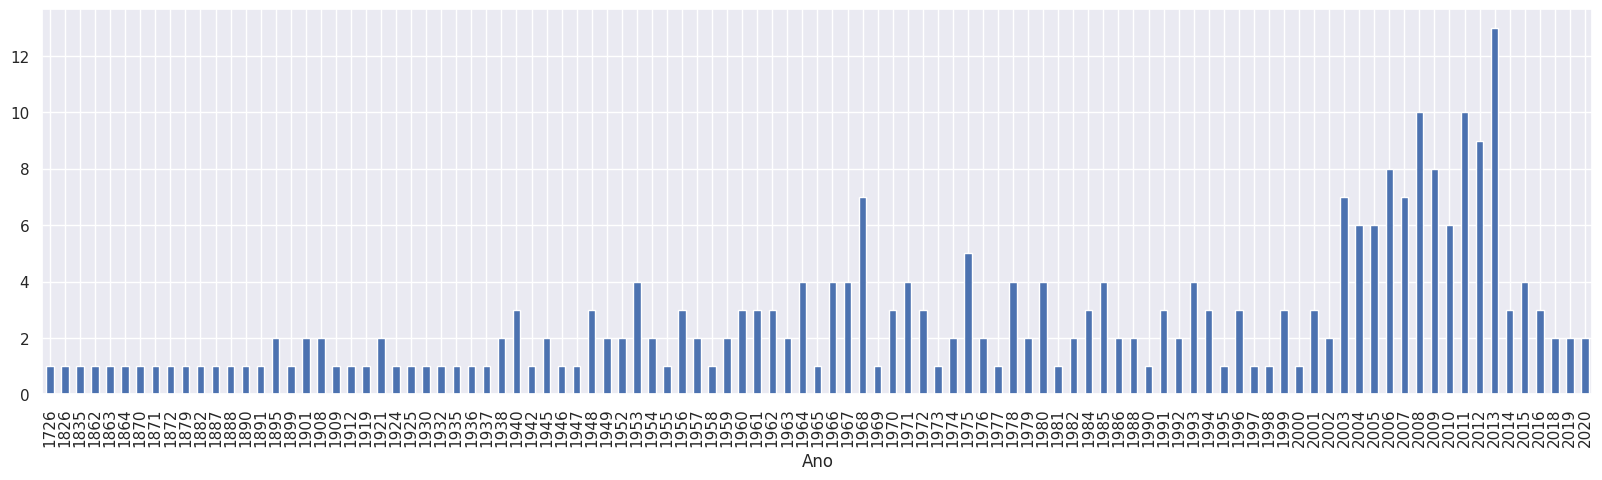

In [12]:
contagem = df.value_counts("Ano", sort=False, ascending=True)
contagem.plot.bar()

In [13]:
ano_livro = df.groupby("Ano")["Ano"].filter(lambda x : len(x)>1).value_counts(dropna=False,sort=True, ascending=False)

<AxesSubplot: >

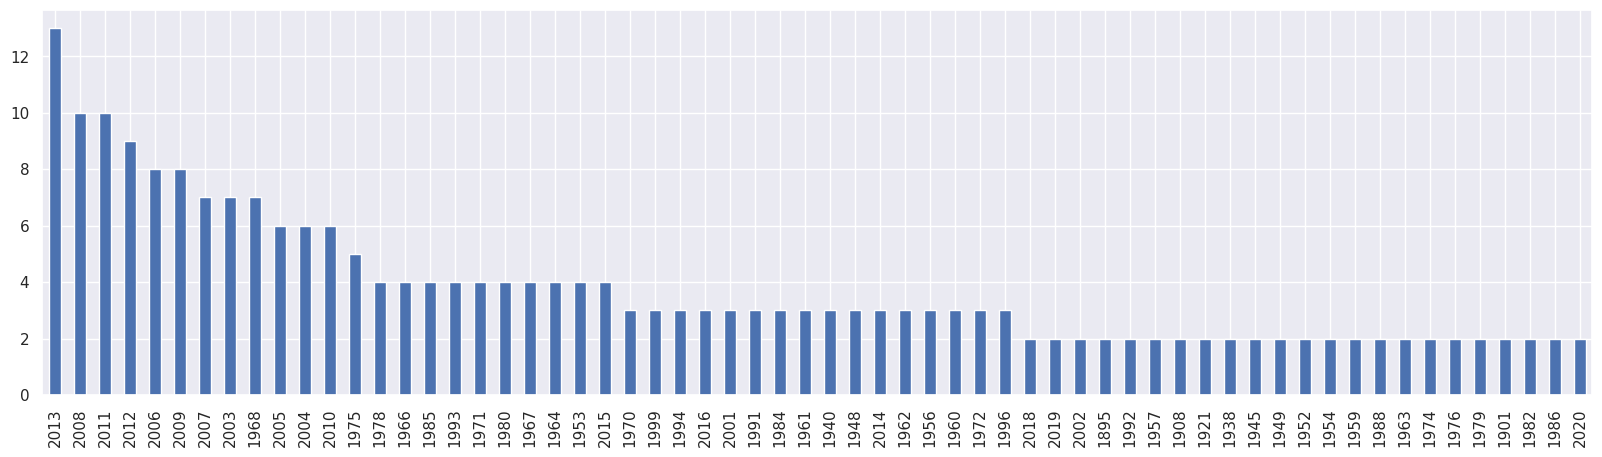

In [14]:
ano_livro.plot.bar()

In [15]:
df.loc[lambda df: df["Ano"] == 2013].sort_values(by=["Autor"])

,Livro,Ano,Autor
266,Reboot,2013,Amy Tintera
232,The Office of Mercy,2013,Ariel Djanikian
230,The Circle,2013,Dave Eggers
233,Wool,2013,Hugh Howey
261,The Elite,2013,Kiera Cass
231,MaddAddam,2013,Margaret Atwood
260,Prodigy,2013,Marie Lu
265,Champion,2013,Marie Lu
262,The 5th Wave,2013,Rick Yancey
229,The Bone Season,2013,Samantha Shannon


In [16]:
df["Autor"].value_counts(dropna=False,sort=True, ascending=False)

Philip K. Dick               13
Margaret Peterson Haddix      5
Margaret Atwood               5
John Christopher              5
Scott Westerfeld              4
                             ..
Norman Spinrad                1
Jean Raspail                  1
Suzy McKee Charnas            1
Samuel R. Delany              1
Victoria Aveyard              1
Name: Autor, Length: 197, dtype: int64

In [17]:
prolific=df.groupby("Autor")["Autor"].filter(lambda x : len(x)>1).value_counts(dropna=False,sort=True, ascending=False)

<AxesSubplot: >

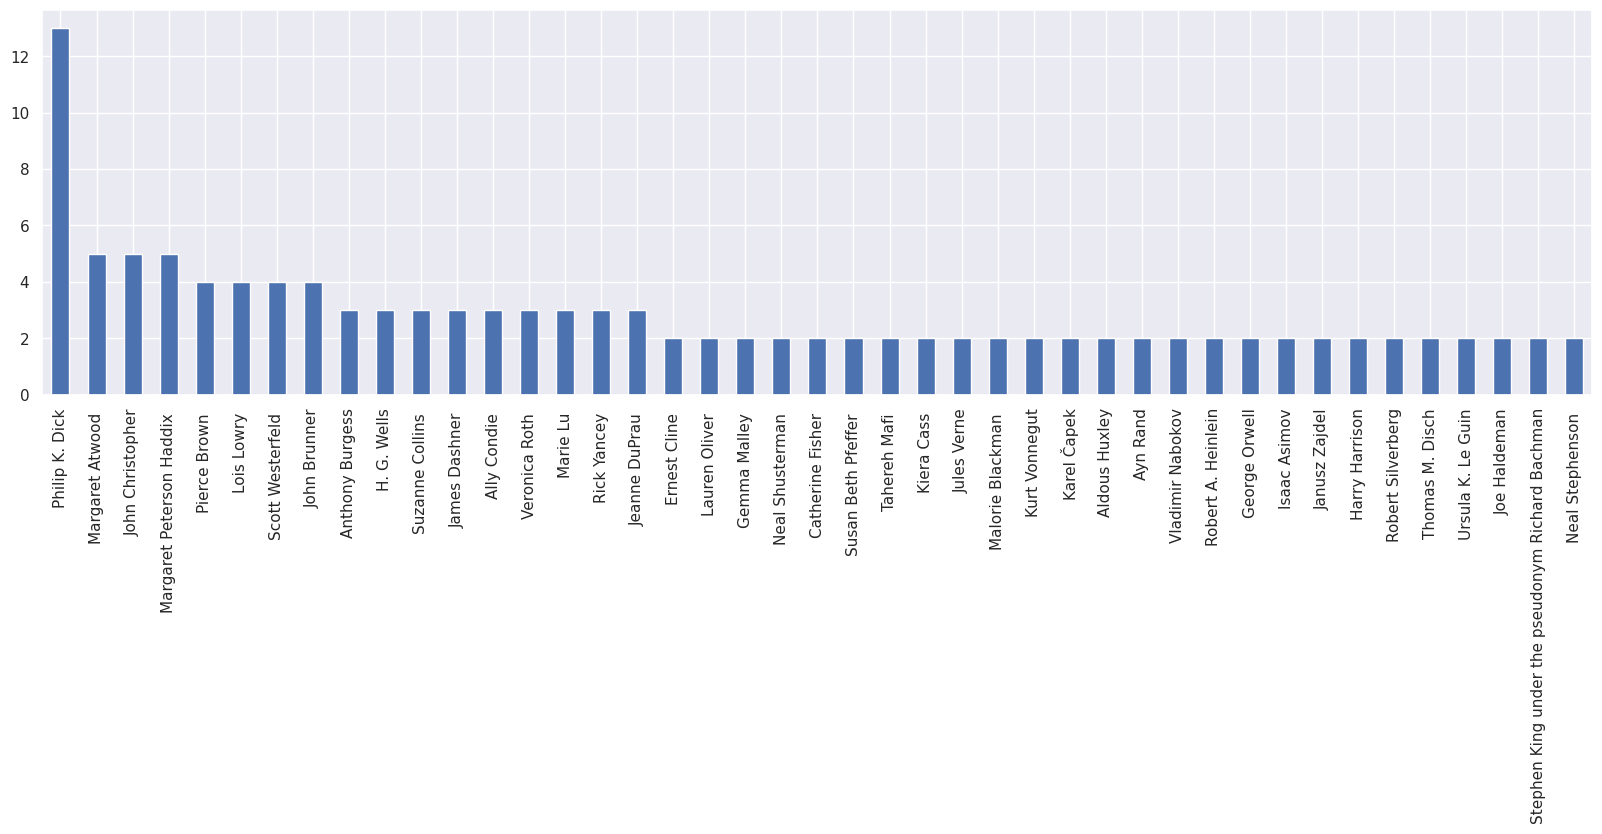

In [18]:
prolific.plot.bar()

In [19]:
df.loc[lambda df: df["Autor"] == "Philip K. Dick"].sort_values(by=["Ano"])

,Livro,Ano,Autor
59,Minority Report,1956,Philip K. Dick
60,The World Jones Made,1956,Philip K. Dick
66,Dr. Futurity,1960,Philip K. Dick
68,Vulcan's Hammer,1960,Philip K. Dick
73,The Man in the High Castle,1962,Philip K. Dick
79,The Penultimate Truth,1964,Philip K. Dick
80,The Three Stigmata of Palmer Eldritch,1964,Philip K. Dick
82,The Crack in Space,1966,Philip K. Dick
85,Now Wait for Last Year,1966,Philip K. Dick
93,Do Androids Dream of Electric Sheep?,1968,Philip K. Dick
